# Project: Wrangling and Analyze Data

## Imports

In [1]:
import pandas as pd
import requests
import os

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'secret'
consumer_secret = 'secret'
access_token = 'secret'
access_secret = 'secret'

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Store the data from the CSV file into a dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Preview the dataframe
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Add the url of the file to download
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Get the data using requests
response = requests.get(url)
# Test if the request was succsesful: code 200 means success
response

<Response [200]>

In [5]:
# Create a file and store the result in the file
with open("image_predictions.tsv", "w") as f:
    f.write(response.text)

In [6]:
# Store the data into a dataframe, use \t as seperator since the file is tab-seperated
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

# Preview the data
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = twitter_archive_df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail with error: " + str(e) )
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [8]:
import json

# Store the filename of the stored data from the api
filename = 'tweet-json.txt'

# Using readlines()
tweet_json = open(filename, 'r')
Lines = tweet_json.readlines()

# Create an array of dictionaries from the string dictionary 
tweet_json_array = []
count = 0
for line in Lines:
    tweet_data = json.loads(line.strip())
    tweet_json_array.append(tweet_data)
    count += 1
print(count)

2354


In [9]:
# Preview the structure of the data
pretty = json.dumps(tweet_json_array[0], indent=4)
print(pretty)

{
    "created_at": "Tue Aug 01 16:23:56 +0000 2017",
    "id": 892420643555336193,
    "id_str": "892420643555336193",
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
    "truncated": false,
    "display_text_range": [
        0,
        85
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "user_mentions": [],
        "urls": [],
        "media": [
            {
                "id": 892420639486877696,
                "id_str": "892420639486877696",
                "indices": [
                    86,
                    109
                ],
                "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
                "url": "https://t.co/MgUWQ76dJU",
                "display_url": "pic.twitter.com/MgUWQ76dJU",
                "expanded_url": "https://twitter.com/dog_rat

In [10]:
tweet_json_array[0]['id']

892420643555336193

In [11]:
# Covert the dictionary to a dataframe
df = pd.DataFrame.from_dict(tweet_json_array)
df['retweet_count']

0        8853
1        6514
2        4328
3        8964
4        9774
5        3261
6        2158
7       16716
8        4429
9        7711
10       7624
11       5156
12       8538
13       4735
14       2321
15       5637
16       4709
17       4559
18       3732
19       3653
20       5609
21      12082
22      18781
23      10737
24       6167
25       8084
26       3443
27       4610
28       3316
29          4
        ...  
2324      339
2325       44
2326       92
2327      100
2328      595
2329       77
2330      146
2331       96
2332      368
2333       71
2334       82
2335       37
2336     6871
2337       16
2338       73
2339       79
2340       47
2341      174
2342       67
2343      232
2344       61
2345      146
2346      261
2347      879
2348       60
2349       41
2350      147
2351       47
2352       48
2353      532
Name: retweet_count, Length: 2354, dtype: int64

In [12]:
# Create a new dataframe, but keep only the columns we need [minimum:  tweet ID, retweet count, and favorite count.]
twitter_api_df = df[['id', 'retweet_count', 'favorite_count']].copy()

In [13]:
# Preview the datafram
twitter_api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Let's start by checking out each dataframe again

### twitter_archive_df Table

In [14]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
twitter_archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1879,675015141583413248,NaN,NaN,2015-12-10 18:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moe. He's a golden Fetty Woof. Doesn't re...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675015141...,10,10,Moe,None,None,None,None
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
1762,678643457146150913,NaN,NaN,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None


To start of, we know that we the inforamation about tweets divided into 3 tables. The first tideness issue we can notice is that we need to merge the 3 tables into a single master table.

For quality issues using visual assessment, we can see that there is a problem. The 'timestamp' column has '+0000' at the end which we can remove. 

Notice that some dogs don't have names filled in (indicated with 'None'). Also, some dogs have incorrect names which we can see in the .tail() where we could already see 3 dogs who have names as 'a'. 

**Let's take a closer look at some of the names:**

In [17]:
twitter_archive_df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

Clearly there are a lot of incorrect names in this dataset, for example: 'the', 'very', 'one'. We will need to either try and fix this or remove this column completely. Notice that the incorrect names all start with lowercase letters.

**Let's try programmic assessment.**

In [18]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
twitter_archive_df[twitter_archive_df.doggo != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None


We see some columns have missing data, like: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id etc. The columns with information about retweets have missing values when it is an original tweet. We will need this information and therefore the missing values for these columns are not an issue.

When we did our visual assessment, we saw missing values for name, doggo, floofer and more, but they are not displayed here. The issue is that the missing values are marked as 'None' instead of NaN. This could lead to problems and need to be fixed.

There are some issues with these datatypes:
- tweet_id (and other id's) is an integer, but since we don't use this for calculations, we should convert it to a string type.
- timestamps are of type object (string) but it needs to be a datetime type.
- numerator could be a float instead of an int.

With regards to tideness issues, we can see a problem in the **twitter_archive_df**. The problem is that there are value names as column headers (doggo, floofer, pupper, puppo). Instead, we should put all these under a single column name. Since these are the values for dog stage, we can call the column dog_stage for example.

**Let's have a look at the ratings numerator**

In [20]:
twitter_archive_df['rating_numerator'].sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

Here we notice a problem...

Some of the values are belowe 10, and we know that the unique rating system specifies a minimum values of at least 10/10.
We can also see that there are some values that are completely out of the range since there are even values above 100 for example.

In [21]:
twitter_archive_df[ twitter_archive_df.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


By looking at the record, it is unclear what went wrong, but cleary the data has an issue in the numerator field.

The text field in the contains ratings, let's have a look at it:

In [22]:
# Help us see the entire column
pd.set_option('display.max_colwidth', -1)

In [23]:
twitter_archive_df.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

It appear that we can use this field to extract the rating. We saw earlier that the record with id '749981277374128128' had a very large, incorrect rating. Let's find the field_text for that tweet.

In [24]:
twitter_archive_df[ twitter_archive_df.tweet_id == 749981277374128128 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


Above we see a url which will take us to the tweet ('https://t.co/GRXwMxLBkh'). When visiting the tweet, it appears that the rating is in fact correct. To be sure such high rating are scraped correctly, let's review a view more of these high ratings.

In [25]:
# Get the highest ratings
twitter_archive_df.rating_numerator.sort_values().tail()

2074    420 
188     420 
189     666 
313     960 
979     1776
Name: rating_numerator, dtype: int64

In [26]:
# Find the record with rating 960
twitter_archive_df[ twitter_archive_df.rating_numerator == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [27]:
# Use the above id and find the record and field full_text
twitter_archive_df[ twitter_archive_df.tweet_id == 835246439529840640 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


We can see the correct rating for the numerator should be 13 instead of 960. Let's look at 1 more:

In [28]:
# Find the record with rating 666
twitter_archive_df[ twitter_archive_df.rating_numerator == 666]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [29]:
# Use the above id and find the record and field full_text
twitter_archive_df[ twitter_archive_df.tweet_id == 855860136149123072 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


Again, this high score seems to be correct. It is unclear which ratings are correct and which aren't so we might need to replace all of them to be sure it is done correctly.

Let's see why there are some numerators below 10

In [30]:
pd.set_option('display.max_colwidth', -1)

In [31]:
# Filter to find out rating below 10
twitter_archive_df[ twitter_archive_df.rating_numerator < 10].text

45      This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948                          
229     This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                                                 
387     I was going to do 007/10, but the joke wasn't worth the &lt;10 rating                                                                                             
462     RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…                      
485     RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups h

After reading some of the text, and going to some of the links, the ratings below 10 are not tweets or ratings about dogs. They are about other animals or something different. They might be scraped correctly, but they are not relelvant since we only want dogs.

Let's also have a look at the denominator:

In [32]:
twitter_archive_df.rating_denominator.sort_values()

313     0  
2335    2  
516     7  
1576    10 
1575    10 
1574    10 
1573    10 
1572    10 
1563    10 
1570    10 
1569    10 
1568    10 
1567    10 
1566    10 
1565    10 
1564    10 
1577    10 
1571    10 
0       10 
1562    10 
1547    10 
1548    10 
1549    10 
1550    10 
1551    10 
1552    10 
1553    10 
1554    10 
1555    10 
1556    10 
        .. 
782     10 
781     10 
775     10 
799     10 
780     10 
779     10 
776     10 
777     10 
778     10 
800     10 
784     11 
1068    11 
1662    11 
342     15 
1663    16 
1165    20 
1598    20 
1433    40 
1202    50 
1351    50 
1274    50 
433     70 
1843    80 
1254    80 
1228    90 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

Here we can see another issue. Denominators should be out of 10, nothing else. We will need to address this. Let's see if we can find out why this is happening:

In [33]:
twitter_archive_df.loc[twitter_archive_df.rating_denominator != 10, 'tweet_id']

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

Let's look at some of these records

In [34]:
# Show entire column
pd.set_option('display.max_colwidth', -1)

In [35]:
twitter_archive_df[twitter_archive_df.tweet_id == 835246439529840640].rating_denominator

313    0
Name: rating_denominator, dtype: int64

In [36]:
twitter_archive_df[twitter_archive_df.tweet_id == 835246439529840640].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

We can see ithe denominator here was taken incorrectly as 00, instead of 10. This looks like there was a problem with the ratings extraction.

Let's look at one more

In [37]:
twitter_archive_df[twitter_archive_df.tweet_id == 666287406224695296].rating_denominator

2335    2
Name: rating_denominator, dtype: int64

In [38]:
twitter_archive_df[twitter_archive_df.tweet_id == 666287406224695296].text

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

Again, the denominator was extracted as 2 (from the 1/2 - which is supposed to mean a halve)instead of 10.

### image_predictions table

In [39]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


No noticeable problems through visual assessment for quality or tideness.

**Let's do the programmatic assessment:**

In [40]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The tweet_id is of type integer again, but it needs to be of type object. All other datatypes seem to be correct and there are no missing values.

### twitter_api_df Table

In [41]:
twitter_api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


With regards to tideness, the full_text column will be a better fit in the **twitter_archive_df** table. We can use this column to populate some of the missing dog names.

In [42]:
twitter_api_df[12:13]

,id,retweet_count,favorite_count
12,889665388333682689,8538,38818


In [43]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Once again, the id needs to be a string type instead of an integer.

### Quality issues
1. Only want the original tweet, not any re-tweets **[twitter_archive_df]** [Validility]

2. Remove the trailing +0000 from the timestamps. **[twitter_archive_df]** [Consistency]

3. Errenous numerator ratings **[twitter_archive_df]** [Accuracy]

4. Errenous denominators **[twitter_archive_df]** [Accuracy]

5. Erronous data types [Validility]
    - Id's should be string instead of integers in **[twitter_archive_df]**, **[image_predictions_df]** and **[twitter_api_df]** tables
    - Timestamps should be datetime format instead of string **[twitter_archive_df]**
    - Ratings should preferably be type float instead of integer.

6. Missing values should are as NaN instead of 'None'. **[twitter_archive_df]** [Consistency]

7. Incorrect names for some of the dogs (like dogs with a name of 'a', 'very', 'the'). **[twitter_archive_df]** [Accuracy]

8. Some tweets are not about dogs, and some ratings are not about dogs. [Validility]



### Tidiness issues
1. The tables need to be merged into 1 single table to contain all information about the tweets.

2. Remove values used as column names and place them under a single column name - dog_stage **[twitter_archive_df]**


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

Since working with tidy data is easier, we will start of by fixing the tideness issues.

In [44]:
# Make copies of original pieces of data
twitter_archive_df_cleaned = twitter_archive_df.copy()
twitter_api_df_cleaned = twitter_api_df.copy()
image_predictions_df_cleaned = image_predictions_df.copy()

### Tideness Issue #1: The tables need to be merged into 1 single table to contain all information about the tweets.


#### Define

To merge all dataframes into a single one, we will use the **pd.merge** method. To use this method, we need 1 column that exists in all 3 of the dataframes. We have the **tweet_id** field which we can use for this purpose. The twitter_api_df table also has this field, but this needs to be **renamed** to match the other fields.

#### Code

In [45]:
# Before joiining dataframes into a master, make sure the column to join on has the same name in all dataframe
twitter_archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [46]:
image_predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
twitter_api_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


To join we need a common column. Change twitter_api_df column name id to match with others **(tweet_id)**

In [48]:
twitter_api_df_cleaned.rename(columns = {'id':'tweet_id'}, inplace = True)

In [49]:
twitter_api_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


Now we can join the datasets

In [50]:
# Merge the datasets into a master
twitter_archive_master = pd.merge(twitter_archive_df_cleaned, twitter_api_df_cleaned, on='tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_df_cleaned, on='tweet_id')

#### Test

In [51]:
# Allow trucating of columns again
pd.reset_option('display.max_colwidth')

In [52]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

The master dataset contains all columns and was thus successful.

### Tideness Issue #2: Remove values used as column names and place them under a single column name - dog_stage [twitter_archive_df]

#### Define

The dog_stage at this moment is split between 4 columns - doggo, floofer, pupper, puppo. We need to combine these into a single column name called 'dog_stage'

In [53]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

Look at these columns again:

In [54]:
twitter_archive_master[['doggo', 'floofer', 'pupper', 'puppo']].head(10)


,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


Notice that empty fields are marked as a string with the text 'None'. We can also see that if there is a dog_stage, it appears only in 1 of the 4 columns.

To address this issue, we can convert all of the 'None' values to an empy string '', then we can create our 'dog_stage' column by appending these 4 columns. Since only 1 of the 4 fields have a value (in the case that there is a value), the final value should be correct.

#### Code

In [55]:
# Replace the None values with empty strings
twitter_archive_master.doggo.replace('None', '', inplace=True)
twitter_archive_master.floofer.replace('None', '', inplace=True)
twitter_archive_master.pupper.replace('None', '', inplace=True)
twitter_archive_master.puppo.replace('None', '', inplace=True)

In [56]:
# Create and fill a new column - dog_stage - with the 4 columns combined
twitter_archive_master['dog_stage'] = twitter_archive_master.doggo + twitter_archive_master.floofer + twitter_archive_master.pupper + twitter_archive_master.puppo 

In [57]:
# Remove/drop the 4 columns since we have the result in the new dog_stage column
twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [58]:
# Replace empty string with nan
twitter_archive_master.loc[twitter_archive_master.dog_stage == '', 'dog_stage'] = np.nan

In [59]:
twitter_archive_master.loc[twitter_archive_master.dog_stage.notnull(),  'dog_stage']

9              doggo
12             puppo
14             puppo
28            pupper
38             doggo
41           floofer
44            pupper
50            pupper
63             puppo
67            pupper
71            pupper
78            pupper
80             puppo
83            pupper
84             doggo
91            pupper
92             doggo
101            doggo
108            puppo
112           pupper
140            puppo
143            doggo
154       doggopuppo
159           pupper
160     doggofloofer
170            doggo
178           pupper
194            doggo
199            doggo
200           pupper
            ...     
1602          pupper
1607          pupper
1616          pupper
1623          pupper
1629          pupper
1632          pupper
1639          pupper
1644          pupper
1653          pupper
1659          pupper
1660          pupper
1667          pupper
1670          pupper
1676          pupper
1678          pupper
1682          pupper
1689         

There is 1 issue, some of the fields have 2 stages, doggo and another 1, so we can just address this as well by seperating these with a comma seperated string.

In [60]:
# handle multiple stages
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [61]:
twitter_archive_master.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


The new dog_stage column has been added and filled. The 4 columns were also successfully dropped.

### Quality Issue #1: Only want the original tweet, not any re-tweets.

#### Define:

In order to keep only the original tweets, we can make use of the twitter_archive_df table using any of the retweeted columns. We will keep it simple and use the 'retweeted_status_id' column. The records that have no data in this column (**NaN**) will be the original tweets since they have no retweet information, which we will assume means that the tweet is not a retweet.

We might need to then remove all of the records that we remove from the twitter_archive_df table from the other 2 tables as well, in order to have consistency.

In [62]:
# See if there are columns with non-null values for retweet columns
twitter_archive_master[twitter_archive_master['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,NaN
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,pupper
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False,NaN
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True,NaN
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,...,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,NaN
133,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,...,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False,NaN
170,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,...,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,doggo
171,851861385021730816,NaN,NaN,2017-04-11 18:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,8.482894e+17,3.410211e+08,2017-04-01 21:42:03 +0000,https://twitter.com/eddie_coe98/status/8482893...,...,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False,NaN
186,847971574464610304,NaN,NaN,2017-04-01 00:39:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @basic_vacek_: I love my new mug easy 13/10...,8.479710e+17,5.970642e+08,2017-04-01 00:36:55 +0000,https://twitter.com/basic_vacek_/status/847971...,...,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False,NaN
209,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,NaN


#### Code

In [63]:
# Assign a mask to filter out and only keeps values that have NaN for the retweets
twitter_archive_master = twitter_archive_master[twitter_archive_master['retweeted_status_id'].isnull()]

#### Test

In [64]:
# Return results to see if there are still records that have retweet infomration
twitter_archive_master[twitter_archive_master['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


Since no records were returned, this means the operation was succesful

### Quality Issue #2: Remove the trailing +0000 from the timestamps from the *twitter_archive_df* table.

#### Define:

We can remove these easily since they always appear at the end of the string and are always 5 characters long. To remove them we can use string slicing to accomplish this as follow **[:-5]**

#### Code

In [65]:
twitter_archive_master.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [66]:
# Remove +0000 from the timestamp
twitter_archive_master['timestamp'] = twitter_archive_master['timestamp'].str[:-5]

#### Test

In [67]:
twitter_archive_master.timestamp.head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

In [68]:
twitter_archive_master.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN
2072,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN


We can see from the table that the extra chaacters were removed succesfully

### Quality Issue #3: Incorrect numerator for some of the ratings

#### Define 

To fix this issue, we can get re-populate the numerator by using the text field of the tweet and making sure we extract the value (we can use regular expressions). Thereafter, we can drop all the values below 10, since these are tweets that aren't specifically ratings for dogs.

#### Code 

In [69]:
# Import the regular expression library
import re

Let's first get this to work on a single record, then we can use it on the entire dataframe

In [70]:
# Extract the first tweet text and display it
string = twitter_archive_master.text.head(1)
string

0    This is Phineas. He's a mystical boy. Only eve...
Name: text, dtype: object

In [71]:
# result = str_extract_all(string, "[0-9]{1,2}/10")

# Create a regular expression to match a value with 2 or more digits followed by "/10".
x = re.findall("[0-9]{2,}/10", str(string))

In [72]:
x

[]

It seems to work, let's create a string with different edge cases and test it (below 10 and above 10)

In [73]:
myString = "this is by test 0/10 string where I am using 11/10 dummy text 111/10"

In [74]:
# Create a regular expression to match a value with 2 or more digits followed by "/10".
x = re.findall("[0-9]{2,}/10", str(myString))

In [75]:
x

['11/10', '111/10']

In [76]:
# Remove the '/'
numerator = x[0].split('/')

In [77]:
numerator[0]

'11'

We see it skipped the value below 0 and returned the ones above. We are ready to apply this to our dataset.

We can use lambda to apply the steps we used above to each row:

In [78]:
# Apply the regex to every row and store it in a new column
twitter_archive_master['ratings'] = twitter_archive_master.apply(lambda row : re.findall("[0-9]{1,}/10", str(row['text'])) , axis = 1)

In [79]:
# We don't want the value to be in an array so we extract the item from the array
twitter_archive_master['ratings'] = twitter_archive_master['ratings'].str[0]

In [80]:
twitter_archive_master['ratings'].head()

0    13/10
1    13/10
2    12/10
3    13/10
4    12/10
Name: ratings, dtype: object

Now we can exract the numerator from the field and replace the existing values

In [81]:
# Split numerator and denominator - keep only the numerator
twitter_archive_master['ratings'] = twitter_archive_master.apply(lambda row : str(row['ratings']).split("/")[0] , axis = 1)

In [82]:
# Convert ratings to an int
twitter_archive_master['ratings'] = twitter_archive_master['ratings'].astype(float)
# Replace the numerator with ratings column
twitter_archive_master['rating_numerator'] = twitter_archive_master['ratings']

In [83]:
# Remove the ratings column since we moved the result to the rating_numerator column
twitter_archive_master.drop(['ratings'], axis=1, inplace=True)

#### Test

In [84]:
twitter_archive_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN


We can see there is now onlt 

### Quality Issue #4: Incorrect denominators

#### Define

We know that all ratings need to be out of 10. In the previous quality issue, we exctracted only numerators that had '/10' after a value. This means that all the numerators that are now populated were followed by a '/10', so we can simply fill all denominators with 10, where the numerator is not null

#### Code

In [85]:
# First we erase the existing denominator column by filling it with NaN
twitter_archive_master.rating_denominator = np.nan

In [86]:
# Get recrods where the numerators are not null, fill the corresponding denominator with 10
twitter_archive_master.loc[twitter_archive_master.rating_numerator.notnull(), 'rating_denominator'] = 10

#### Test

In [87]:
twitter_archive_master.rating_denominator.value_counts()

10.0    1981
Name: rating_denominator, dtype: int64

We can see that all of the denominators now have a value of 10

In [88]:
pd.set_option('display.max_columns', None)
twitter_archive_master[twitter_archive_master.rating_numerator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
345,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,NaN,NaN,None,3716,13518,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,NaN
415,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
734,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,NaN,NaN,None,2539,5316,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,NaN
924,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,NaN,NaN,this,1434,4196,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,NaN
1022,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,NaN,NaN,None,829,3062,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,NaN
1047,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,NaN,NaN,None,636,2529,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,NaN
1065,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,NaN,NaN,None,721,2634,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,NaN
1131,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,NaN,NaN,a,1028,3201,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,NaN
1207,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,NaN,NaN,None,1552,3748,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True,NaN
1379,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,NaN,NaN,None,2

### Quality Issue #5: Erronous data types

#### Define

We noticed issues with the datatypes of the ids and timestamps. To fix the issues with the id's, we want to convert it from an integer to a string type. We can do this by using the **astype(str)** method on each of the id columns.

The seconds datatype issue is *'Timestamps should be datetime format instead of string'*. We can fix this by using the **pd.to_datetime()** method on the appropriate columns.

In [89]:
# Look at the datatypes for each columnn
twitter_archive_master.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator            float64
name                           object
retweet_count                   int64
favorite_count                  int64
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
dog_stage   

We need to fix the datatypes of the following columns:
- tweet_id [convert to timetamp]
- timestamp [convert to datetime]
- in_reply_to_status_id [float to string]
- in_reply_to_user_id [float to string]
- retweeted_status_id [float to string]
- retweeted_status_user_id [float to string]
- retweeted_status_timestamp [float to datetime]

The last 3 columns in the list above are columns that we don't need anymore and won't be using. Columns that start with retweeted contains information only if the tweet was a retweet. Since we removed all tweets that were retweets, these columns should be empty and we can then remove them from the dataframe since they contain no information.

#### Code

Let's ensure these contain no data

In [90]:
# Get the row count for the retweet columns
print(len(twitter_archive_master[twitter_archive_master.retweeted_status_id.notnull()]))
print(len(twitter_archive_master[twitter_archive_master.retweeted_status_user_id.notnull()]))
print(len(twitter_archive_master[twitter_archive_master.retweeted_status_timestamp.notnull()]))

0
0
0


They are indeed empty, so let's remove them

In [91]:
# Remove the 3 empty columns
twitter_archive_master.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [92]:
# Review the datatypes that need to be fixed
twitter_archive_master[['tweet_id', 'timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 2 columns):
tweet_id     1994 non-null int64
timestamp    1994 non-null object
dtypes: int64(1), object(1)
memory usage: 46.7+ KB


In [93]:
# Fix the tweet-id datatype and other ids
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype(str)
twitter_archive_master['in_reply_to_status_id'] = twitter_archive_master['in_reply_to_status_id'].astype(str)
twitter_archive_master['in_reply_to_status_id'] = twitter_archive_master['in_reply_to_status_id'].astype(str)
twitter_archive_master['in_reply_to_user_id'] = twitter_archive_master['in_reply_to_user_id'].astype(str)

In [94]:
# Fix the timestamp datatype
twitter_archive_master.timestamp =  pd.to_datetime(twitter_archive_master['timestamp'])

#### Test

In [95]:
# See if the retweet columns are gone
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

In [96]:
# Test if ids' datatype is fixed
twitter_archive_master.dtypes

tweet_id                         object
in_reply_to_status_id            object
in_reply_to_user_id              object
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                float64
rating_denominator              float64
name                             object
retweet_count                     int64
favorite_count                    int64
jpg_url                          object
img_num                           int64
p1                               object
p1_conf                         float64
p1_dog                             bool
p2                               object
p2_conf                         float64
p2_dog                             bool
p3                               object
p3_conf                         float64
p3_dog                             bool
dog_stage                        object
dtype: object

We can see the dtype is not object/string type so this issue has been fixed

In [97]:
# Test timestamp datatype
twitter_archive_master.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

We can see that timestamp now has the datetime format

### Quality Issue #6: Incorrect names for some of the dogs (like dogs with a name of 'a', 'very', 'the').

#### Define

Some of the dogs have incorrect names like 'a', 'very', and 'the'. To fix the issue we can use the full_text column and look for the dog's name and populate it. These names all seem to start with a lowercase,

In [98]:
# Print all names that start with a lowercase
twitter_archive_master[twitter_archive_master['name'].str.islower()].name.value_counts()

a               55
the              7
an               6
one              4
very             4
quite            3
just             3
getting          2
this             1
my               1
officially       1
unacceptable     1
light            1
his              1
actually         1
by               1
infuriating      1
such             1
incredibly       1
space            1
not              1
all              1
Name: name, dtype: int64

We can see that all of these values in the name field that starts with a lowercase letter seem to be incorrect. To fix this issue, we can either try to get the correct names, or drop them.

We will drop these values and replace them with NaN.

#### Code

In [99]:
# Replace the incorrect names with NaN
twitter_archive_master.loc[twitter_archive_master['name'].str.islower(), 'name'] = np.nan

#### Test

In [100]:
len(twitter_archive_master[twitter_archive_master['name'].notnull & twitter_archive_master['name'].str.islower()].name)

0

We can see there are no records left where name starts with a lowercase letter

### Quality Issue #7: Missing values should are as NaN instead of 'None'.

#### Define

The data in this table has a lot of missing values, but we didn't pick them up since instead of **NaN** they are of string type and marked as 'None'.
To fix this issue, we can simple run a **replace()** method and replace all occurences with *np.nan*

In [101]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1981 non-null float64
rating_denominator       1981 non-null float64
name                     1896 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog      

#### Code

In [102]:
twitter_archive_master.replace('None', np.nan, inplace=True)

#### Test

In [103]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1981 non-null float64
rating_denominator       1981 non-null float64
name                     1350 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog      

We can now see a better representation of where our null values are, escpecially with the dog-stages.

### Quality Issue #8: Some tweets are not about dogs and ratings about dogs

#### Define

We need to remove all of the tweets that are not about dogs. Specifically, we need to remove all tweets that are not about rating dogs.

We can start by dropping all rows which has no ratings. We filled in the ratings and saw that the tweets with incorrect denominators, and also the tweets which has numerators below 10, were not about ratings of dogs.

Since we only stored the ratings which had denominators of 10, and numerators above (and including) 10, we know that all of the rows with ratings are valid. This means we can simply drop the rows that do not have any values for their ratings.

#### Code

In [104]:
# See the records which we want to remove
twitter_archive_master[twitter_archive_master.rating_numerator.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
345,820690176645140481,nan,nan,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,NaN,NaN,NaN,3716,13518,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,NaN
415,810984652412424192,nan,nan,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN
734,758467244762497024,nan,nan,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,NaN,NaN,NaN,2539,5316,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,NaN
924,731156023742988288,nan,nan,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,NaN,NaN,NaN,1434,4196,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,NaN
1022,713900603437621249,nan,nan,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,NaN,NaN,NaN,829,3062,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,NaN


In [105]:
# Drop all rows where there is no numerator_rating value
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.rating_numerator.isnull()].index, inplace=True)

Now let's remove the rows which has numerator ratings below 10, since we know these aren't ratings for dogs

In [106]:
twitter_archive_master[twitter_archive_master.rating_numerator < 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
40,883482846933004288,nan,nan,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN
185,848212111729840128,nan,nan,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6.0,10.0,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False,NaN
249,835152434251116546,nan,nan,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10.0,NaN,3443,24574,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,NaN
588,781661882474196992,nan,nan,2016-09-30 01:08:10,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5.0,10.0,NaN,3129,11634,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True,NaN
615,777885040357281792,nan,nan,2016-09-19 15:00:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3.0,10.0,Wesley,1893,7078,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True,NaN


In [107]:
# Drop all rows where numerator is below 10
twitter_archive_master.drop(twitter_archive_master[twitter_archive_master.rating_numerator < 10].index, inplace=True)

#### Test

Let's see if there are still records with no value for rating_numerator

In [108]:
twitter_archive_master[twitter_archive_master.rating_numerator.isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


All of the rows with numerator below 10 were removed.

Let's see if all the records with numerator ratings below 10 were also removed

In [109]:
twitter_archive_master[twitter_archive_master.rating_numerator < 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage


There are no more records with no rating_numerator value, and all values with numerator below 10 are also gone.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
# Save the dataframe to a CSV
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [111]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [112]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


Let's take a look at the numerator of the ratings

In [113]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

In [114]:
df_master['rating_numerator'].mean()

12.86687898089172

We get some insights about the ratings, the **mean rating** is **12.87**

Let's look at the dog types of the tweets

In [115]:
# Get the counts for each value
df_master.p1.value_counts()

golden_retriever                  129
Labrador_retriever                 84
Pembroke                           83
Chihuahua                          63
chow                               41
pug                                40
Samoyed                            39
Pomeranian                         38
toy_poodle                         33
malamute                           26
cocker_spaniel                     25
Chesapeake_Bay_retriever           20
French_bulldog                     20
Siberian_husky                     19
Eskimo_dog                         18
German_shepherd                    17
miniature_pinscher                 17
Cardigan                           16
Staffordshire_bullterrier          16
teddy                              15
Rottweiler                         15
web_site                           15
kuvasz                             14
Shih-Tzu                           14
Maltese_dog                        13
Shetland_sheepdog                  13
beagle      

We can see the most common dogs in tweets are the **Golden Retriever**.

Let's look at the predictions and determine how many of the predictions are actually dogs.

In [116]:
# Get the value_counts for each answer
df_master.p1_dog.value_counts().sort_values()

False     324
True     1246
Name: p1_dog, dtype: int64

In [117]:
# Store the results
dogs_false = df_master.p1_dog.value_counts().sort_values()[0]
dogs_true = df_master.p1_dog.value_counts().sort_values()[1]

In [118]:
# Get the count which we'll use as the denominator
dogs_counts = len(df_master)
# Get the percentage for each of the counts
dogs_false_percentage = (dogs_false / dogs_counts) * 100
dogs_true_percentage = (dogs_true / dogs_counts) * 100

In [119]:
dogs_false_percentage

20.636942675159236

In [120]:
dogs_true_percentage

79.363057324840767

About **20.63%** of the predictions of tweets about dogs aren't for dogs.

### Insights:
1.  The mean rating for dogs are **12.87/10**

2. The most common dogs in tweets are the **Golden Retriever**.

3. About **20.63%** of the predictions of tweets about dogs aren't for dogs.

### Visualization

Text(0,0.5,'Count')

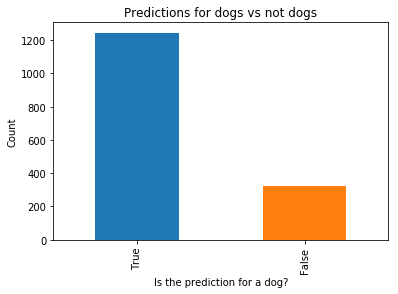

In [121]:
df_master['p1_dog'].value_counts().plot(kind='bar', title='Predictions for dogs vs not dogs')
plt.xlabel("Is the prediction for a dog?")
plt.ylabel("Count")

We can see that there are a lot of prediction which are not even for dogs, but the majority is for dogs. When we were analyzing, the predictions might not be for dogs since the dogs do not appear to be the subject of the image, but these images do still contain dogs, even though the predictions say otherwise